In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from CloudSaturation import CloudSaturation

from Utils import *
# Configurator is awailable on
# https://apps.sentinel-hub.com/configurator/#/configurations
# username: koprivec.filip@gmail.com
# password: stefanpass

# If major edits are in order, just create new WMS instance (dont forget to update instanceid)


In [2]:
# Requesting size of Slovenia BB results in error "The bounding box area is too large! Please zoom in."
tulip_box = [52.85905593845727, 4.71038818359375,52.91204098150524, 4.798278808593751]
full_tulip_box = [52.82601970123596, 4.684766350546853,52.93210351553535, 4.860547600546853]
kocevje_box = [convert_to_dd("""45°34'52.69"N"""), convert_to_dd("""14°49'23.05"E"""),convert_to_dd("""45°36'34.31"N"""), convert_to_dd("""14°52'29.75"E""")]
#tulip_box = home_box
# This bounding box is also small enough so that all images are from the same tile -> no problems with cut-off
cloud_sat = CloudSaturation(tulip_box, cloud_scale=6)
kocevje_cloud = CloudSaturation(kocevje_box)
netherlands_cloud = CloudSaturation(full_tulip_box, cloud_scale=6)

In [3]:
mask, true_c, bands, dates, cloud_masks = cloud_sat.get_cloud_saturation_mask()
#mask_full, true_c_full, bands, dates_full, cloud_masks_full = netherlands_cloud.get_cloud_saturation_mask()

Saved True color
Saved bands
Saved bands
Downloaded
(100, 99)
Detected
(105, 600, 594)
(105, 589, 590)
(589, 590, 3)


In [4]:
# Layers from geopedia that currently work (Also see CloudSaturation.py)
# layers = {'tulip_field_2016':'ttl1904', 'tulip_field_2017':'ttl1905', 'arable_land_2017':'ttl1917'}

# Get dataseries for same region (to reuse cloud data)
field, mask_t, nonzero = cloud_sat.get_tulip_mask("tulip_field_2016")
#field_full, mask_full_t, nonzero_full = netherlands_cloud.get_tulip_mask("tulip_field_2016")
# Nonzero contains nonzero indices (tulips ARE on such index), see later code for correst indexing

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=589&width=590&srs=EPSG:3857&bbox=524358.0140363087,6956969.518615424,534141.9536568124,6966744.426812873


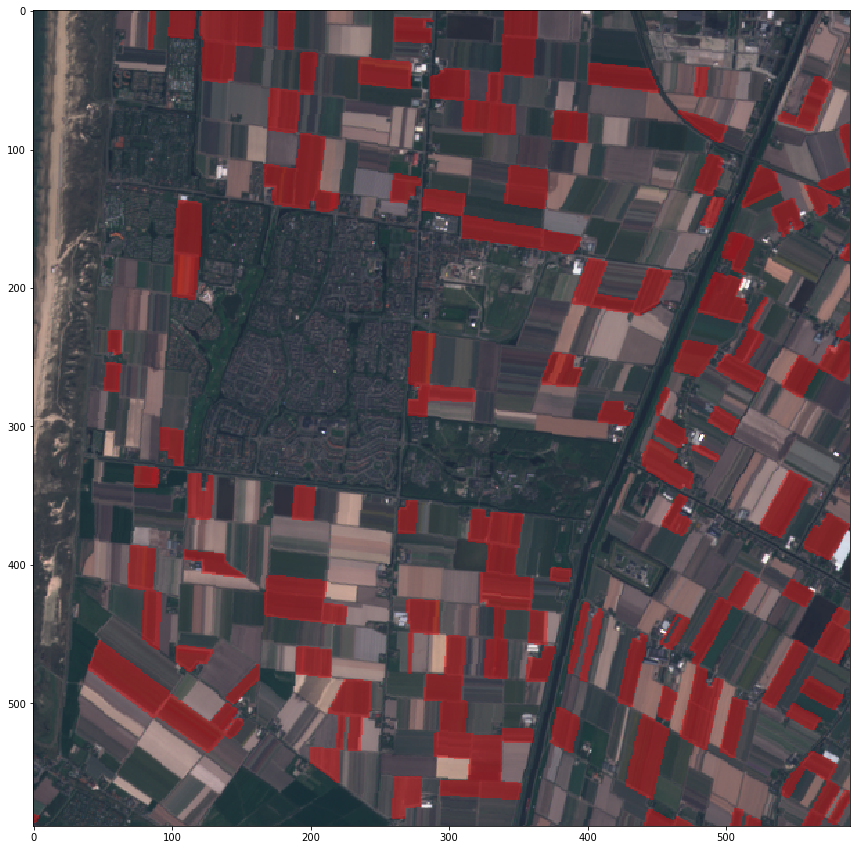

In [5]:
# If mask_maps is not None, for every image in images, each is overlayed with different color
overlay_cloud_mask(true_c[9], [mask_t], mask_maps = [[255, 0, 0]])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def split_train_test_cv(data, train_p=0.5, cv_p=0.5, shuffle=None, state=None):
    if shuffle is 0:
        print("Probably not what you want")
    train, test = train_test_split(data, train_size=train_p, shuffle=shuffle, random_state=state)
    cv, test = train_test_split(test, train_size=cv_p, shuffle=shuffle, random_state=state)
    return train, cv, test

In [8]:
#overlay_cloud_mask(bands[21][:,:,0], [mask_t], mask_maps = [[255, 0, 0]])

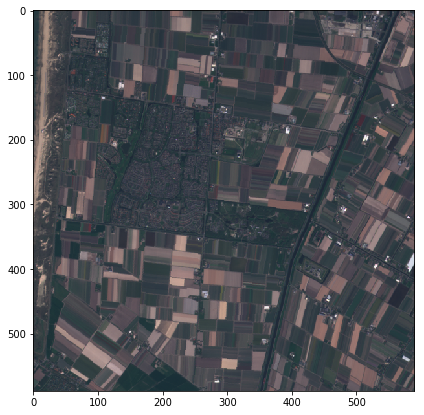

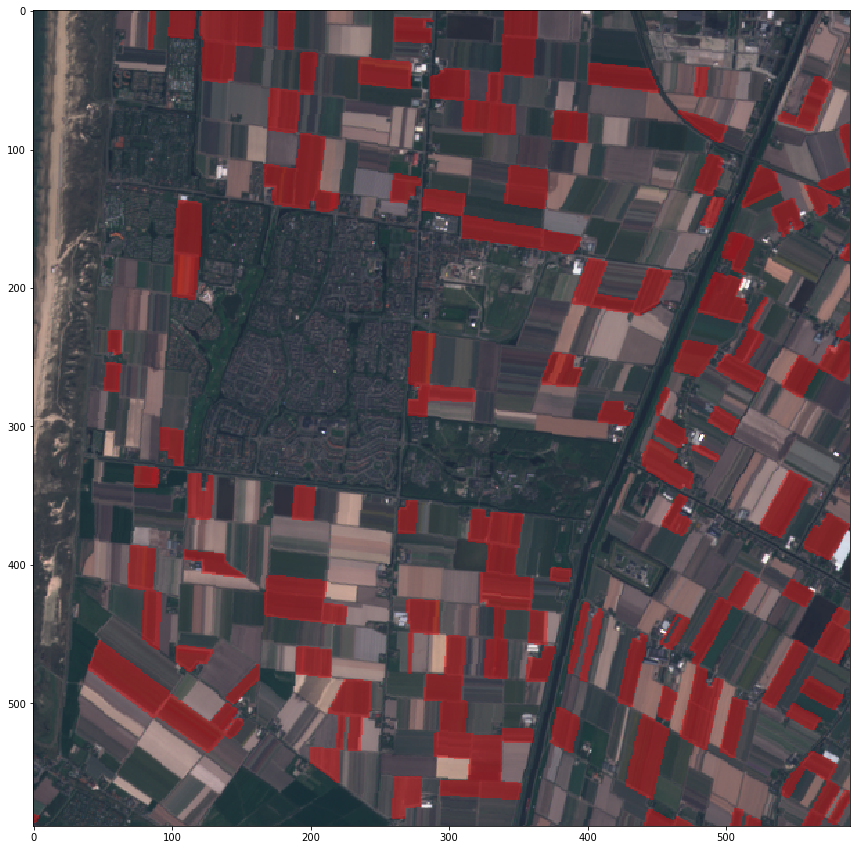

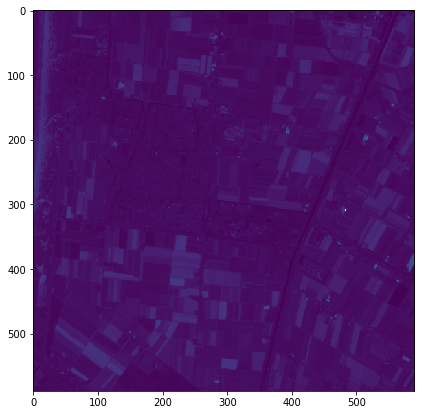

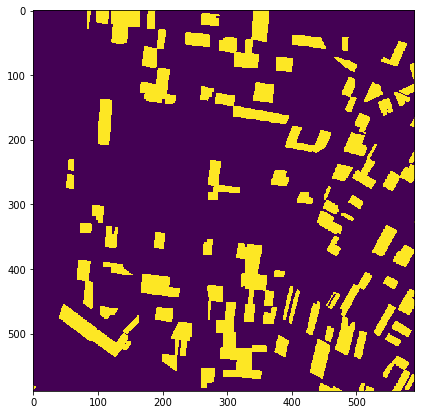

In [9]:
plot_image(true_c[9])
overlay_cloud_mask(true_c[9], [mask_t], mask_maps = [[255, 0, 0]])
plot_image(bands[9][:,:,2], 2.5)
plot_image(mask_t)

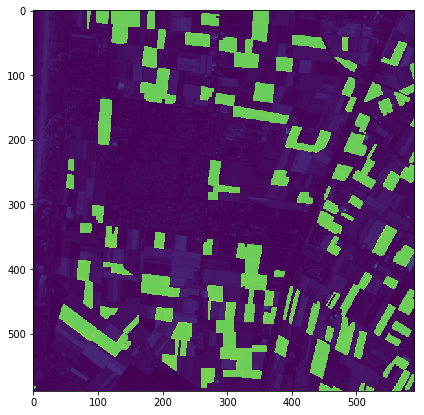

In [10]:
plot_image(bands[9][:,:,1] + mask_t, 2.5)

In [11]:
bands[9][1,0,:]

array([0.124 , 0.0987, 0.0899, 0.0609, 0.0678, 0.0424, 0.0405, 0.0345,
       0.0319, 0.0132, 0.0033, 0.0145, 0.0103], dtype=float32)

In [12]:
mask_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
dates[9]

datetime.datetime(2016, 4, 21, 10, 50, 29)

In [14]:

n=len(mask_t)
n=150
y = np.array([]) #tulip
x = np.array([]) #bands in array

for i in mask_t:
    y = np.concatenate((y,i),axis=0)

x = bands[9][:,:,:].reshape(13,-1)
x = np.transpose(x)

print(y) 
print(x)
x.shape

[0. 0. 0. ... 0. 0. 0.]
[[0.124  0.281  0.1083 ... 0.3221 0.1238 0.3578]
 [0.0993 0.3051 0.0943 ... 0.4264 0.1364 0.3602]
 [0.0896 0.1254 0.0818 ... 0.4594 0.1165 0.3867]
 ...
 [0.1051 0.1775 0.1844 ... 0.1375 0.062  0.0028]
 [0.2312 0.1348 0.206  ... 0.0034 0.1327 0.2279]
 [0.2821 0.129  0.2015 ... 0.1793 0.2979 0.1664]]


(347510, 13)

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import tree

In [16]:
X = x[:,0:4] #bands used for regression

In [17]:
X

array([[0.124 , 0.281 , 0.1083, 0.2266],
       [0.0993, 0.3051, 0.0943, 0.1078],
       [0.0896, 0.1254, 0.0818, 0.0029],
       ...,
       [0.1051, 0.1775, 0.1844, 0.1566],
       [0.2312, 0.1348, 0.206 , 0.1337],
       [0.2821, 0.129 , 0.2015, 0.1035]], dtype=float32)

In [18]:
regressor = linear_model.LogisticRegression();
#regressor = tree.DecisionTreeClassifier();

predicted = cross_val_predict(regressor, X, y, cv = 3);

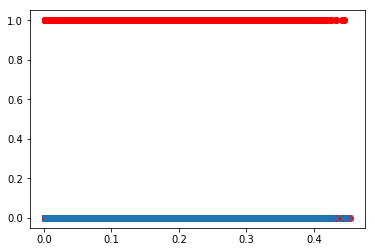

In [19]:
plt.plot(x[:,0],y,'ro', x[:,0], predicted, 'x')

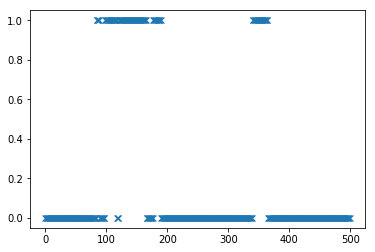

In [20]:
plt.plot(range(len(x[:,0]))[0:500],(y-predicted)[0:500],'x')

In [21]:
a =list(y-predicted)

print(len(a))
print(a.count(-1), a.count(0), a.count(1))

print('not OK',a.count(-1)/len(a), a.count(1)/len(a),'\nOK',  a.count(0)/len(a))

347510
0 288194 59316
not OK 0.0 0.17068861327731577 
OK 0.8293113867226842


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted);
r2

-0.20581969090265573